In [187]:
library(latex2exp)

In [162]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

In [80]:
library(ggplot2)
library(tidyverse)

In [81]:
rm(df)

In [137]:
for_p <- function(p) {
    df<-expand.grid(ph=seq(0.05,0.95,length.out=100),f=seq(0,1,length.out=100), m = c(1e-3,0.01,0.02,0.05,0.1,0.2), p = p)
    df |> 
        mutate(oa = 1/ph * (1-m), ob = 1/(1-ph)*(1-m)) |>
        mutate(e=(ob*(1-f) - oa*f)*p + 1 -ob*(1-f)) |>
        mutate(opt=(f*p - sqrt(f*f*p*p - f*f*p - f*p*p + f*p))/(f+p-1)) 
}

In [138]:
nrow(df)

[1] 180000

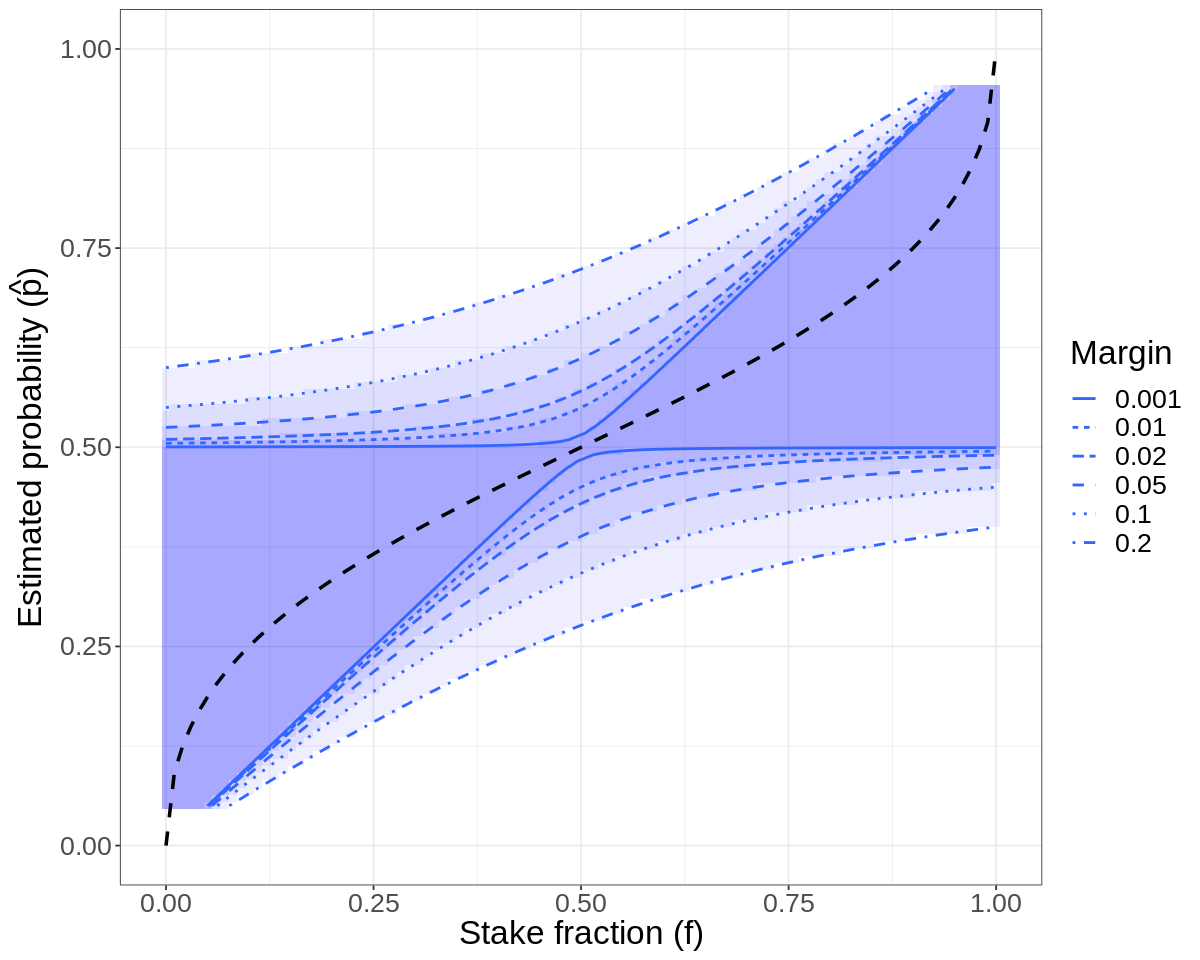

In [206]:
for_p(0.5) |> 
    ggplot(aes(x=f,y=ph,z=e, linetype=as.factor(m))) +
    geom_tile(aes(fill=e>0),show.legend=F) +
    scale_fill_manual(values=c('#ffffff00','#0000ff11')) +
    geom_line(aes(x=f,y=opt),linewidth=1, linetype=2, color='black') +
    geom_contour(breaks=0,linewidth=0.8) +
    labs(linetype="Margin", x="Stake fraction (f)", y = TeX("Estimated probability ($\\hat{p}$)")) +
    theme_bw() +
    theme(text = element_text(size = 20))

In [142]:
for_ph <- function(ph) {
    df<-expand.grid(p=seq(0.05,0.95,length.out=100),f=seq(0,1,length.out=100), m = c(1e-3,0.01,0.02,0.05,0.1,0.2), ph = ph)
    df |> 
        mutate(oa = 1/ph * (1-m), ob = 1/(1-ph)*(1-m)) |>
        mutate(e=(ob*(1-f) - oa*f)*p + 1 -ob*(1-f)) |>
        mutate(opt=(f*p - sqrt(f*f*p*p - f*f*p - f*p*p + f*p))/(f+p-1)) 
}

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `opt = `/`(...)`.
Caused by warning in `sqrt()`:
! NaNs produced”


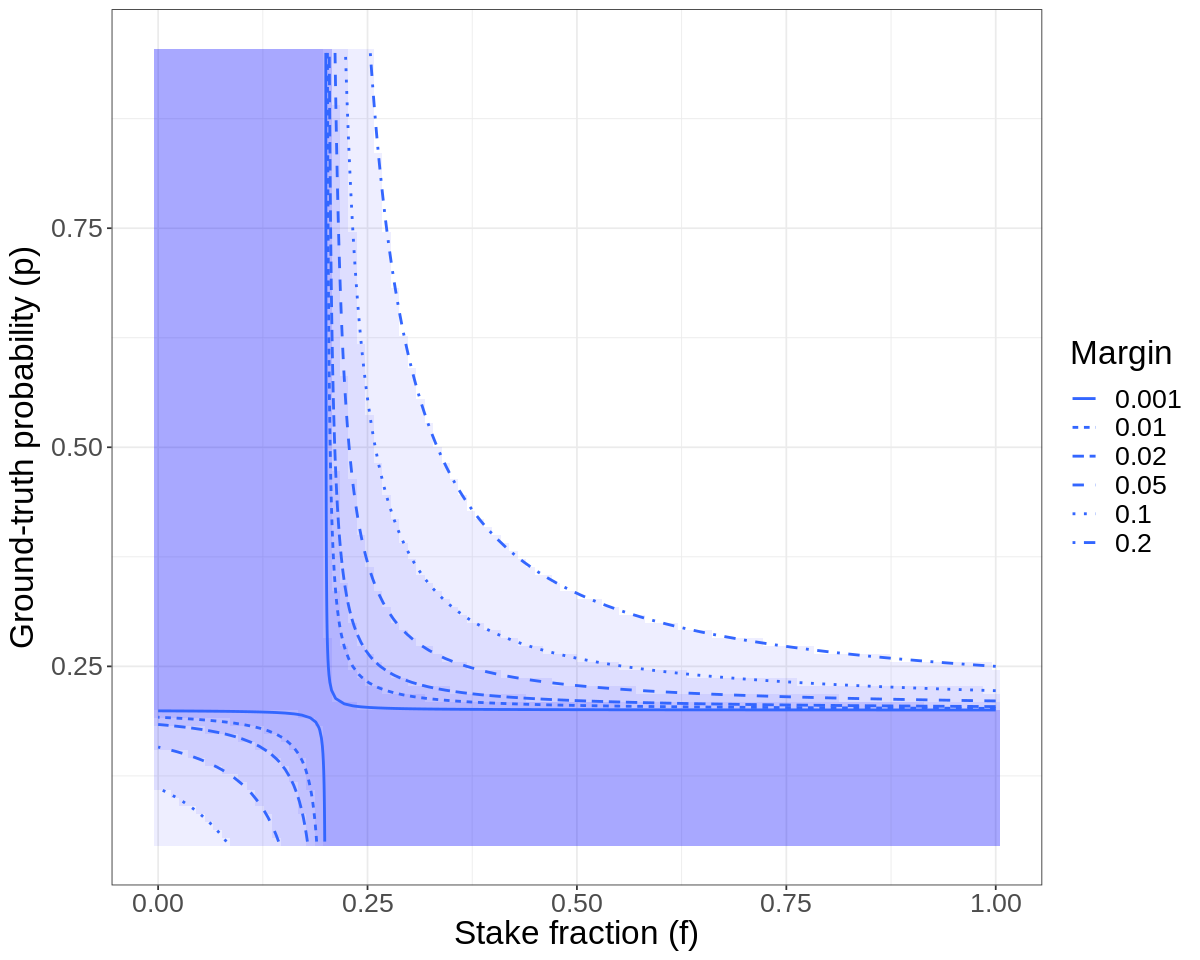

In [202]:
for_ph(0.2) |> 
    ggplot(aes(x=f,y=p,z=e, linetype=as.factor(m))) +
    geom_tile(aes(fill=e>0),show.legend=F) +
    scale_fill_manual(values=c('#00000000','#0000ff11')) +
    #geom_line(aes(x=f,y=opt),linewidth=1, linetype=2, color='green') +    
    geom_contour(breaks=0,linewidth=0.8) +
    labs(linetype="Margin", x="Stake fraction (f)", y = TeX("Ground-truth probability ($p$)")) +
    theme_bw() +
    theme(text = element_text(size = 20))